In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_crispr = pd.read_csv("CRISPRGeneEffect.csv", index_col=0)

In [7]:
df_copy = pd.read_csv("OmicsCNGene.csv", index_col=0)

In [10]:
df_crispr.columns = [s[0:s.index('(')-1] for s in df_crispr.columns]
df_copy.columns = [s[0:s.index('(')-1] for s in df_copy.columns]

In [14]:
ind_common = list(set(df_crispr.index)&set(df_copy.index))

In [20]:
gene1 = 'MTAP'
gene2 = 'PRMT5'

In [21]:
ls_1 = list(df_copy.loc[ind_common, gene1])

In [22]:
ls_2 = list(df_crispr.loc[ind_common, gene2])

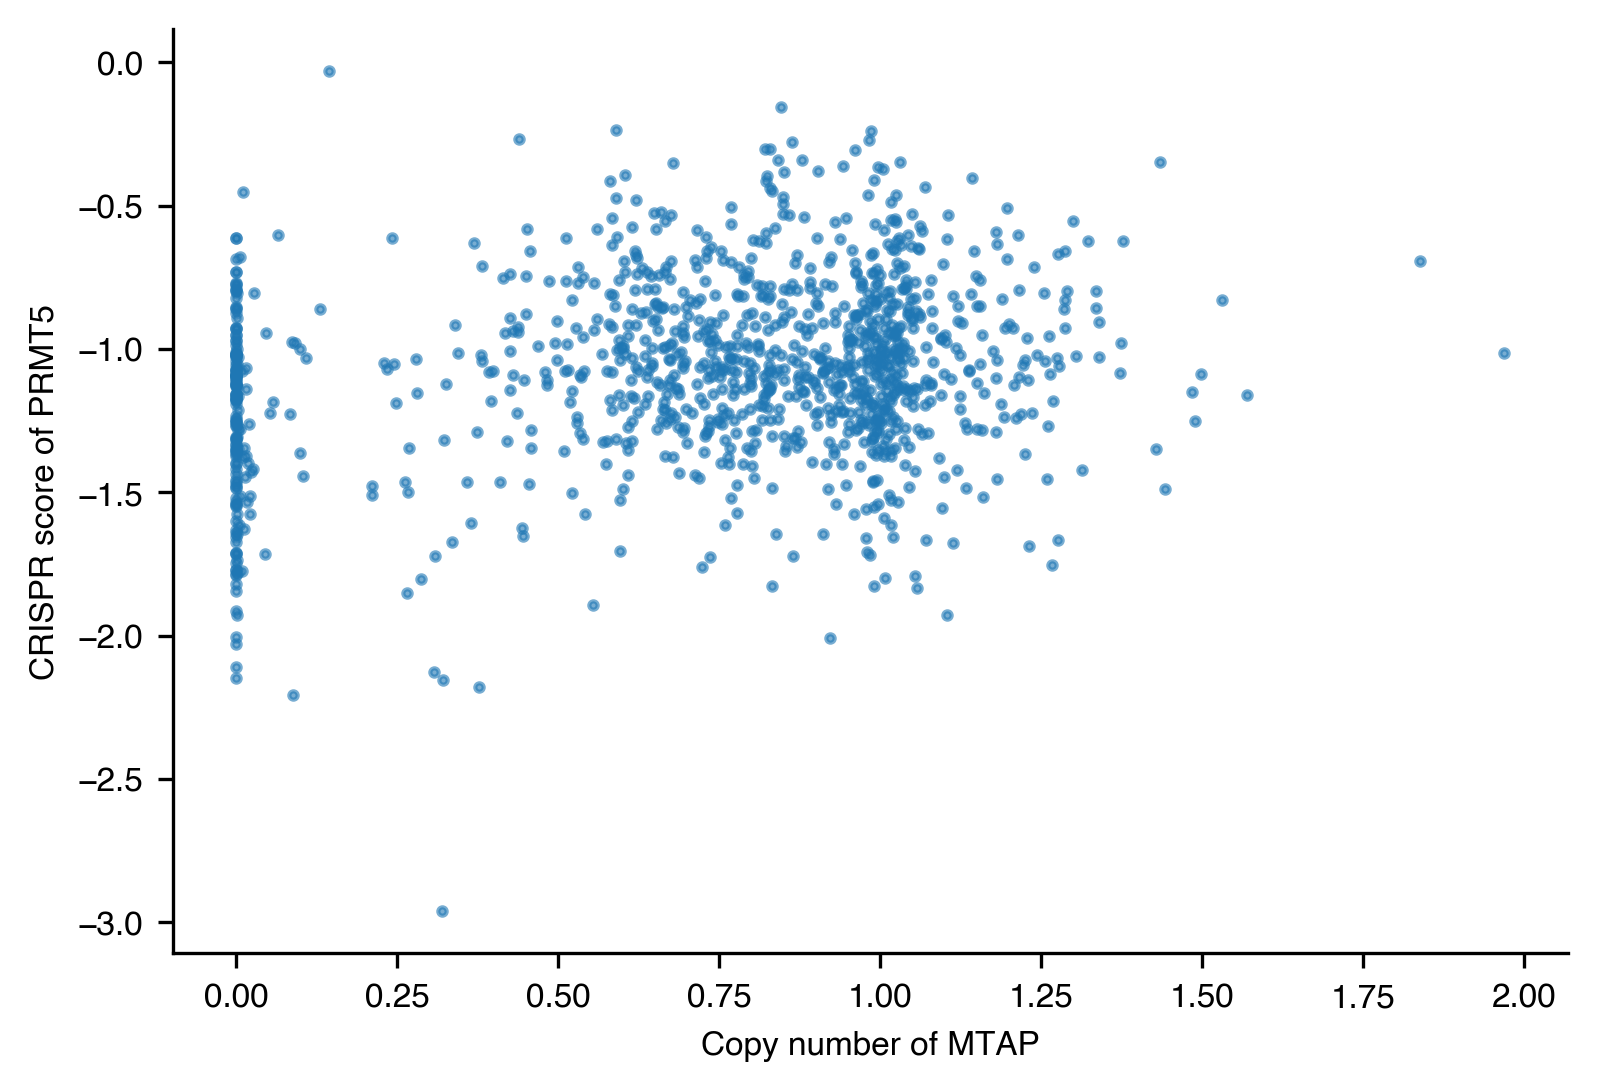

In [25]:
plt.figure(figsize=(6.,4), dpi=300)
plt.rcParams["font.size"] = 8
plt.rcParams["font.family"] = "Helvetica"
plt.scatter(ls_1, ls_2, s=4, alpha=0.6)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel('Copy number of MTAP')
plt.ylabel('CRISPR score of PRMT5')
plt.show()

## 在特定cancertype中观察两基因的相关性

In [26]:
df_cellline = pd.read_csv("Model.csv")
cancertype = "Lung"
df_cancercell = df_cellline[df_cellline["OncotreeLineage"] == cancertype]
cell_ls = [c for c in list(df_cancercell["ModelID"]) if c in ind_common]

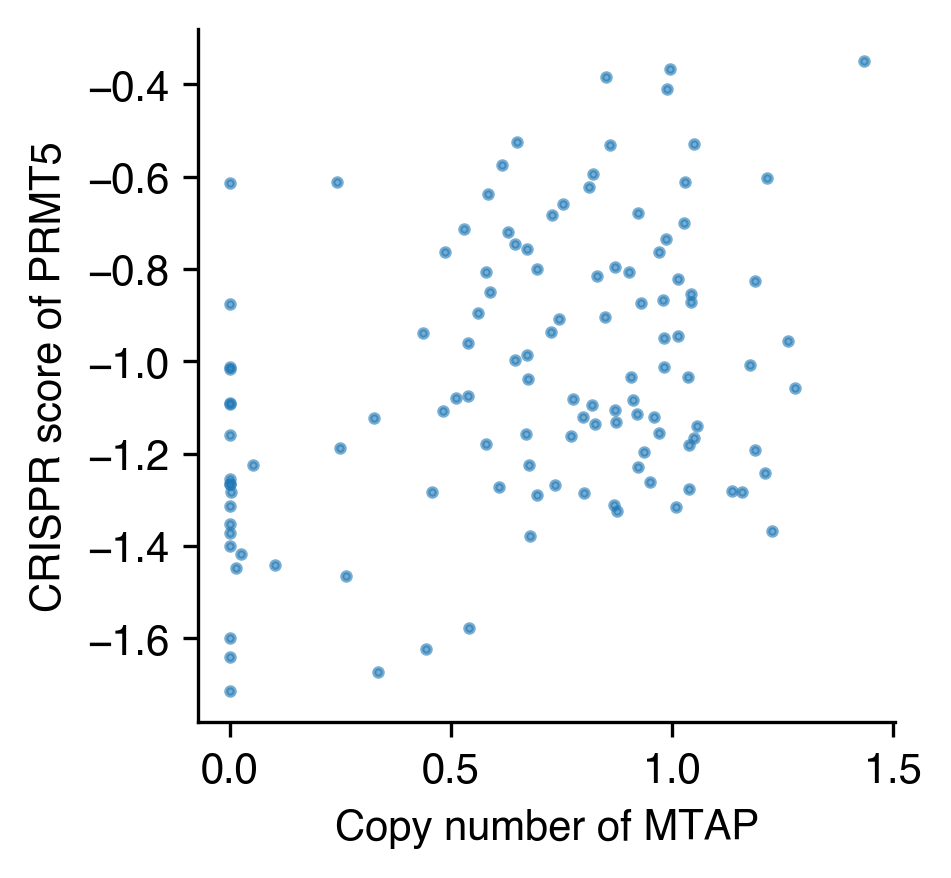

In [28]:
plt.figure(figsize=(3,3),dpi=300)
plt.rcParams["font.size"] = 10
plt.rcParams["font.family"] = "Helvetica"


ls1 = df_copy.loc[cell_ls,gene1]
ls2 = df_crispr.loc[cell_ls,gene2]

plt.scatter(ls1,ls2,s=4,alpha=0.6)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('Copy number of MTAP')
plt.ylabel('CRISPR score of PRMT5')
plt.show()

## 在所有cancertype中观察基因的相关性

In [30]:
cancer_ls = list(set(df_cellline["OncotreeLineage"]))

In [39]:
# 计算有多少个元素并为每个元素对应一个颜色
import matplotlib.colors as mclors
# 计算列表中有多少元素
n = len(cancer_ls)
cmap = plt.get_cmap("rainbow")  # 还有其他颜色图"rainbow", "viridis", "plasma"等
color_list = [cmap(i/n) for i in range(n)]

plt.figure(figsize=(6,4), dpi=300)

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

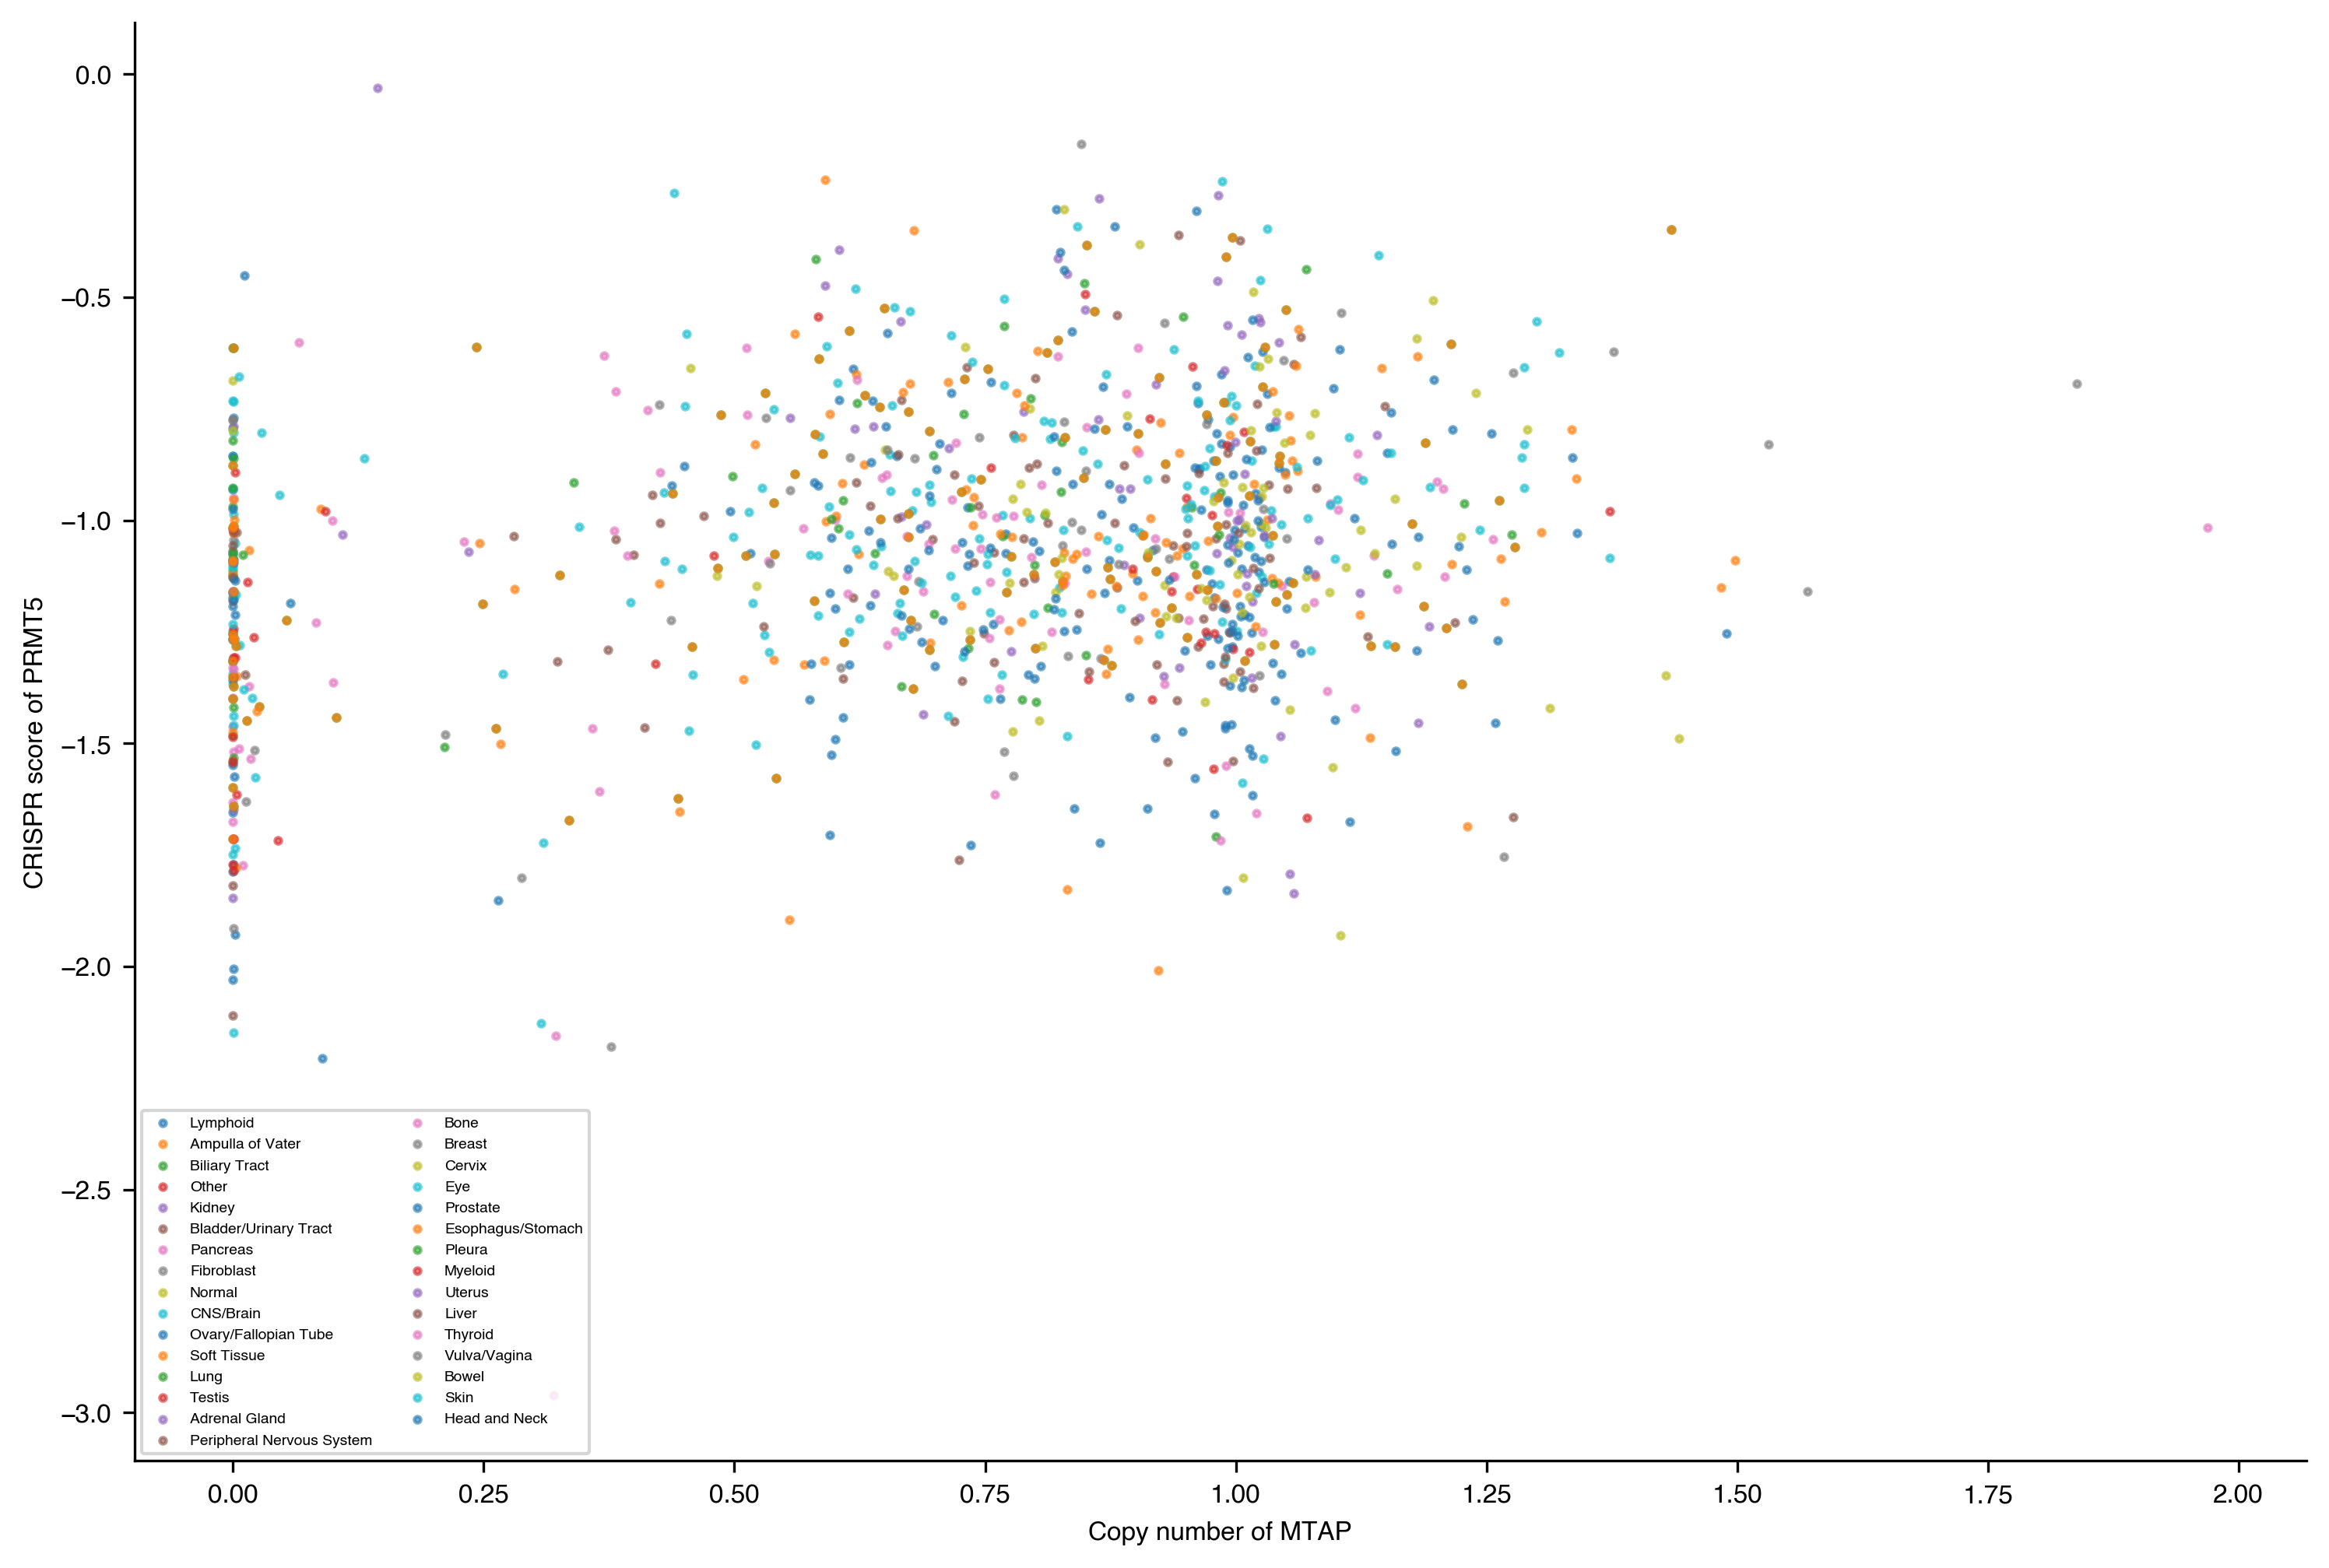

In [43]:
plt.figure(figsize=(12,8),dpi=300)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.rcParams["font.size"] = 8
plt.rcParams["font.family"] = "Helvetica"
color_ind = 0
for cancertype in cancer_ls:
    df_cancercell = df_cellline[df_cellline["OncotreeLineage"] == cancertype]
    cell_ls = [c for c in list(df_cancercell["ModelID"]) if c in ind_common]
    canls1 = df_copy.loc[cell_ls,gene1]
    canls2 = df_crispr.loc[cell_ls,gene2]
    plt.scatter(canls1, canls2, s=4, alpha=0.6, label=cancertype)
    color_ind += 1


plt.scatter(ls1,ls2,s=4,alpha=0.6)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('Copy number of MTAP')
plt.ylabel('CRISPR score of PRMT5')
plt.legend(fontsize='xx-small',loc='lower left',ncol=2)

plt.show()